<a href="https://colab.research.google.com/github/PhuongTa/hocmay/blob/main/Chapter_2_Housing_Value_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# python >3.7 is required
import sys
assert sys.version_info >= (3,7)

# Scikit-learn >= 0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# common import
import numpy as np
import pandas as pd
import os

# to plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize= 8)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Bỏ cảnh báo
import warnings
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "drive/MyDrive/HOCMAY/working/"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images",CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)
DATASETS = "datasets"

# Function to save all figure into folder image
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# 2.Lấy dữ liệu

## 2.1 Tải dữ liệu

In [50]:
"""
Sau khi tải dữ liệu về folder source có thể không cần chạy lại
"""
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/mlbvn/handson-ml2-vn/main/"
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR, DATASETS,"housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"


def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [51]:
# Fetch dữ liệu về
fetch_housing_data()


In [52]:
# ham load du lieu len pandas
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

## 2.2 Xem nhanh Cấu trúc dữ liệu

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [54]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [55]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


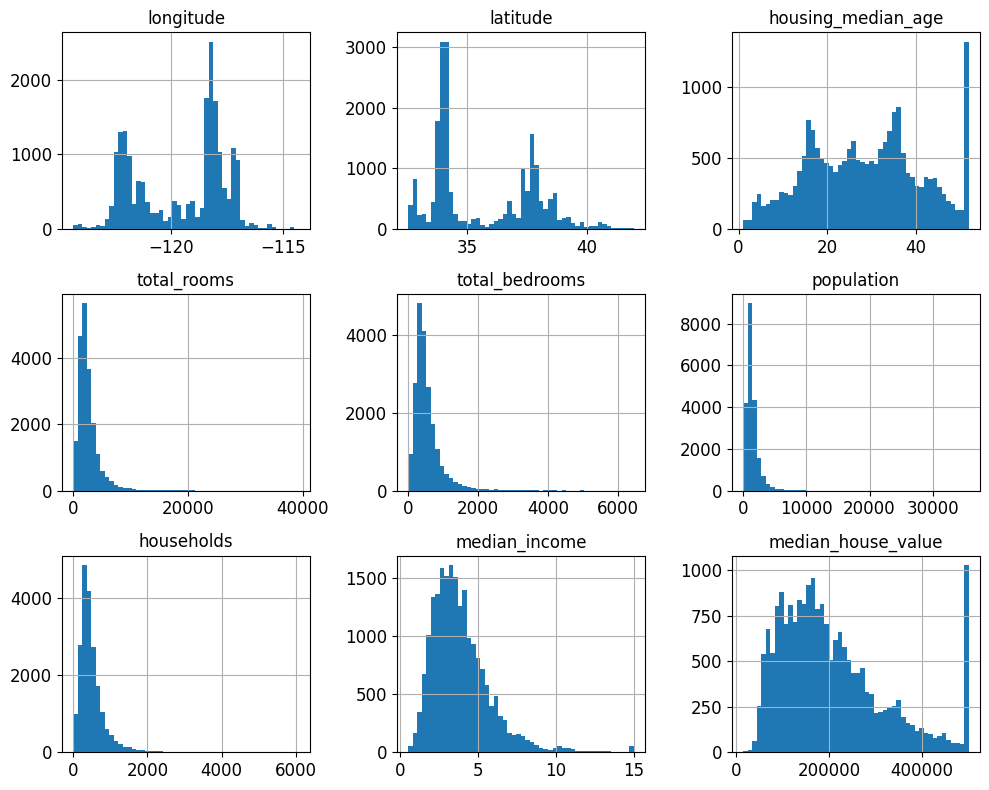

In [57]:
housing.hist(bins = 50, figsize = (10,8))
save_fig("attribute_histogram_plots")
plt.show()

- Các attributes lệch trái khá nhiều.
- Trừ housing_median_age.


## 2.3 Tạo một tập kiểm tra

In [58]:
# khởi tạo random.seed
np.random.seed(42)

In [59]:
# Minh hoạ. Sau ta sẽ sử dụng sklearn. Sklearn có train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [60]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [61]:
len(test_set)

4128

Tuy nhiên cả hai cách trên sẽ không hoạt động trong trường hợp tập dữ liệu được cập nhật. Để có một cách chia ổn định ngay cả trong trường hợp này, một giải pháp thông dụng là sử dụng  ID của mỗi mẫu để quyết định xem liệu nó có thuộc dữ liệu kiểm tra hay không

In [62]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff <test_ratio * 2 * 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



Tập dữ liệu housing không có cột ID, ta sẽ sử dụng INDEX làm ID.

In [63]:
housing_with_id = housing.reset_index() # Thêm cột "index"
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Ngoài ra, ta cũng có thể sử dụng longtitude, latitude kết hợp lại tạo thành ID

In [65]:
housing_with_id["id"] = housing["longitude"]*1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Thông tin vị trí trên thực tế khá thô, kết quả là nhiều quận có chung một ID, nên chúng sẽ luôn ở cùng trong
một tập dữ liệu (huấn luyện hoặc kiểm tra). Điều này có thể dẫn tới một số thiên kiến không mong muốn khi
lấy mẫu.

#### Cách thông dụng khi phân tách train_set, test_set

In [66]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### Lấy mẫu Stratified Sampling. (Nên sử dụng cách này)
Giả sử sau khi thảo luận với chuyên gia, ta biết rằng thu nhập trung vị là một thuộc tính rất quan trọng để dự đoán giá nhà trung vị. Ta cần đảm bảo rằng tập kiểm tra mang tính đại diện cho tất cả các mức thu nhập trong toàn bộ tập dữ liệu. Vì thu nhập trung vị là một thuộc tính liên tục, đầu tiên ta cần tạo thuộc tính hạng mục để biểu diễn các mức thu nhập khác nhau

Saving figure median_income


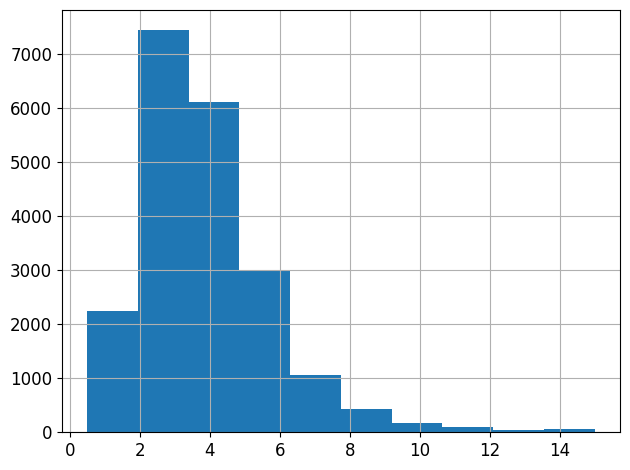

In [67]:
housing["median_income"].hist()
save_fig("median_income")
plt.show()

In [68]:
# Chuyển đổi median_income thành các phân nhóm.
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

Saving figure bins_median_income


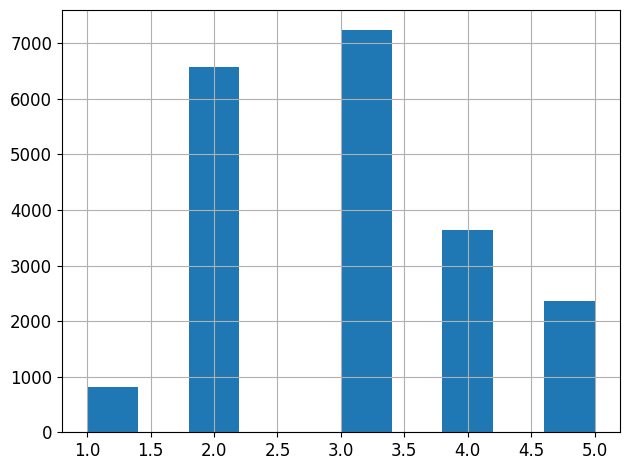

In [69]:
housing["income_cat"].hist()
save_fig("bins_median_income")
plt.show()

- Ta thấy phần lớn các giá trị `median_income` được phân bố trong khoảng từ 1.5 đến 6 `(tức $15,000 – $60,000)`, nhưng có vài giá trị vượt quá 6.
- Việc có đủ mẫu trong tập dữ liệu cho mỗi stratum là rất quan trọng. Nếu không, việc ước lượng độ quan trọng của một stratum sẽ bị thiên kiến.

In [70]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

## Sử dụng StratifiedShuffleSplit
- Nên sử dụng cách này để phân tách dữ liệu X_train, y_train.

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

# Phân chia tập dữ liệu dựa trên biến phân loại income_cat
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state =42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [72]:
# Kiểm tra tỷ lệ phân chia median_income trong các bins.
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [73]:
# kiểm tra tỷ lệ phân chia median_income trong toàn bộ dữ liêu housing.
housing["income_cat"].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Ta có thể thấy tỷ lệ chênh lệch không đáng kể.

In [74]:
# Tổng quan xem xét các phân chia mẫu theo
# Tổng quát | Stratified | Random | Rand. %error | Strat. %error
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(housing),
    "Stratified" : income_cat_proportions(strat_test_set),
    "Random" : income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"]/compare_props["Overall"] -100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"]/compare_props["Overall"] -100

In [75]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


- Có thể thấy, `Stratified sampling` tạo ra tập dữ liệu kiểm tra `có tỷ lệ các mức thu nhập khá giống với tỷ lệ trong tập dữ liệu gốc`, trong khi phân phối của tập dữ liệu lấy mẫu ngẫu nhiên bị thiên lệch.

In [76]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# 3.Khám phá và Trực quan hóa Dữ liệu để có được Thông tin Chi tiết

In [77]:
housing = strat_train_set.copy()

## 3.1 Trực quan hoá Dữ Liệu

Saving figure bad_visualization_plot


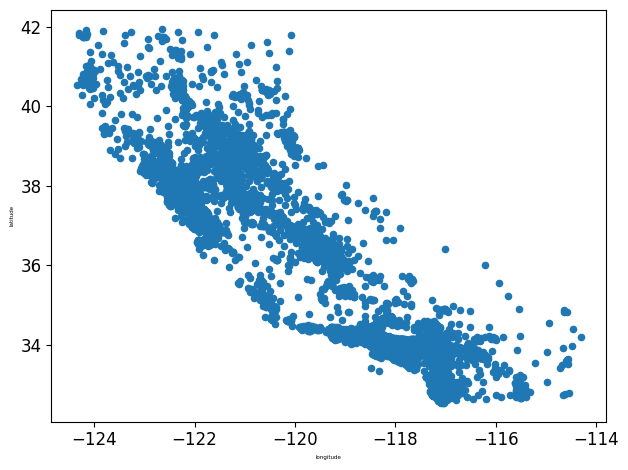

In [78]:
housing.plot(kind="scatter", x="longitude", y ="latitude")
save_fig("bad_visualization_plot")
plt.show()

Saving figure better_visualization_plot


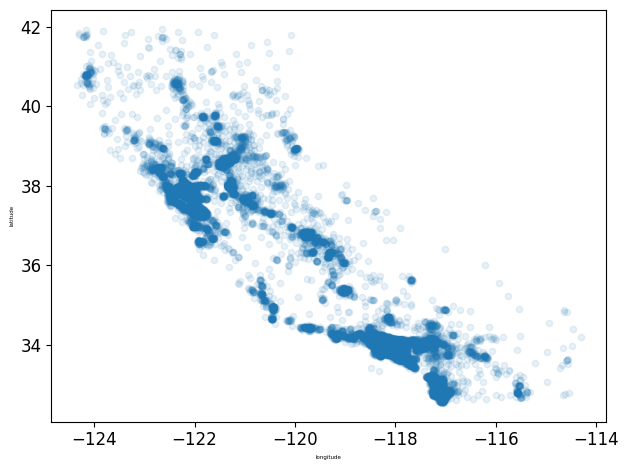

In [79]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
save_fig("better_visualization_plot")

các khu vực đông dân, cụ thể là Bay Area, xung quanh Los Angeles
và San Diego, cộng với một dải dài đông đúc ở Central Valley, đặc biệt là quanh Sacramento v
Fresno.

Saving figure housing_prices_scatterplot


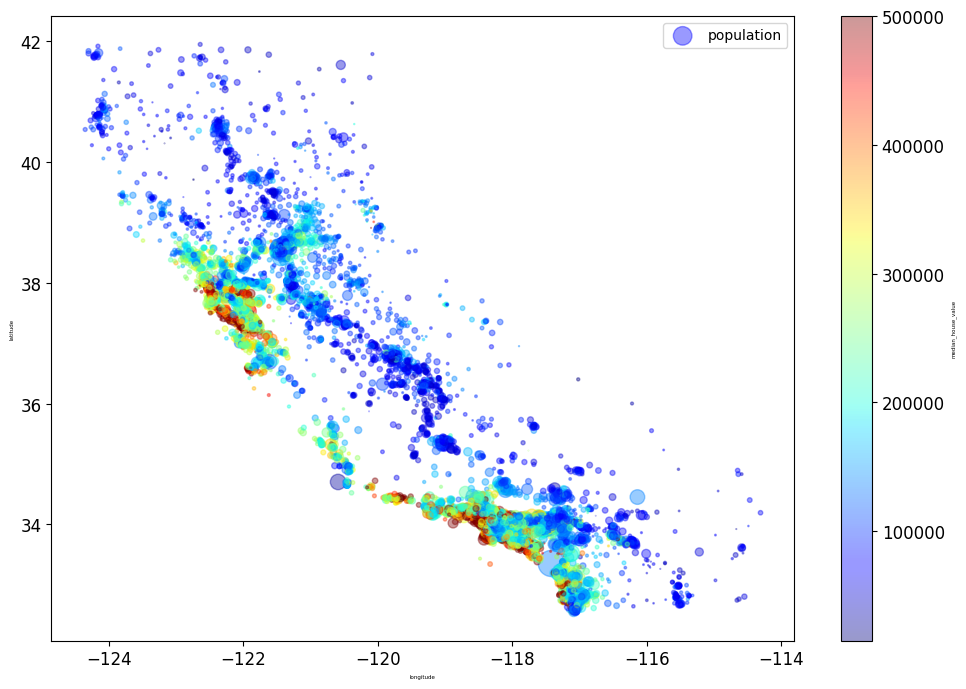

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

Bán kính mỗi vòng tròn đại diện cho dân số của quận
(đối số s), và màu sắc đại diện cho mức giá (đối số c). Ta sẽ sử dụng một bảng màu định nghĩ
sẵn (đối số cmap) có tên là jet, có dải màu từ xanh (giá thấp) đến đỏ (giá cao)o.

### +++ Chèn ảnh nền của california vào biểu đồ.

In [81]:
# Download the California image

images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok = True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/mlbvn/handson-ml2-vn/main/"
filename="california.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('drive/MyDrive/HOCMAY/working/images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7cd66039fd90>)

Saving figure california_housing_prices_plot


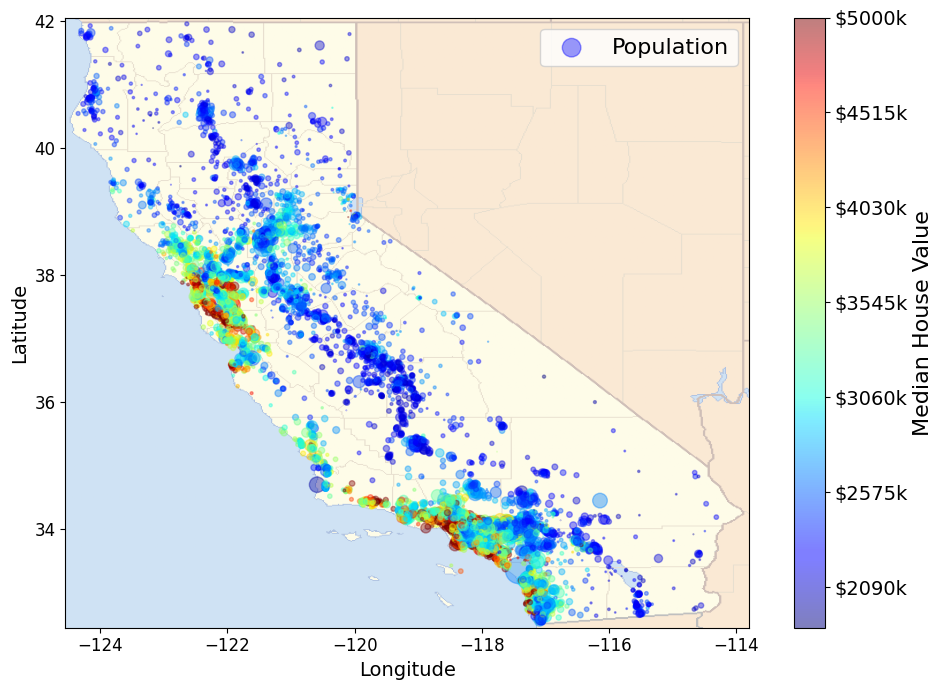

In [83]:
# Hiển thị ảnh california vào trong biểu đồ phân phối.
import matplotlib.image as mpimg

california_img = mpimg.imread(os.path.join(images_path,filename))

ax = housing.plot(kind = "scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing["population"]/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar= plt.colorbar(ticks= tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/100)) for v in tick_values], fontsize=14)
cbar.set_label("Median House Value", fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## 3.2 Tìm sự tương quan
Sự tương quan chuẩn (`Standard correlation coefficient`) = `Hệ số tương quan Pearson r`

#### Cách 1: tính hệ số tương quan

In [84]:
housing_copy= housing.copy()
housing_copy.drop(columns=["ocean_proximity"], axis=1, inplace=True)
corr_matrix = housing_copy.corr()

In [85]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

#### Cách 2: Sử dụng Scatter_matrix()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

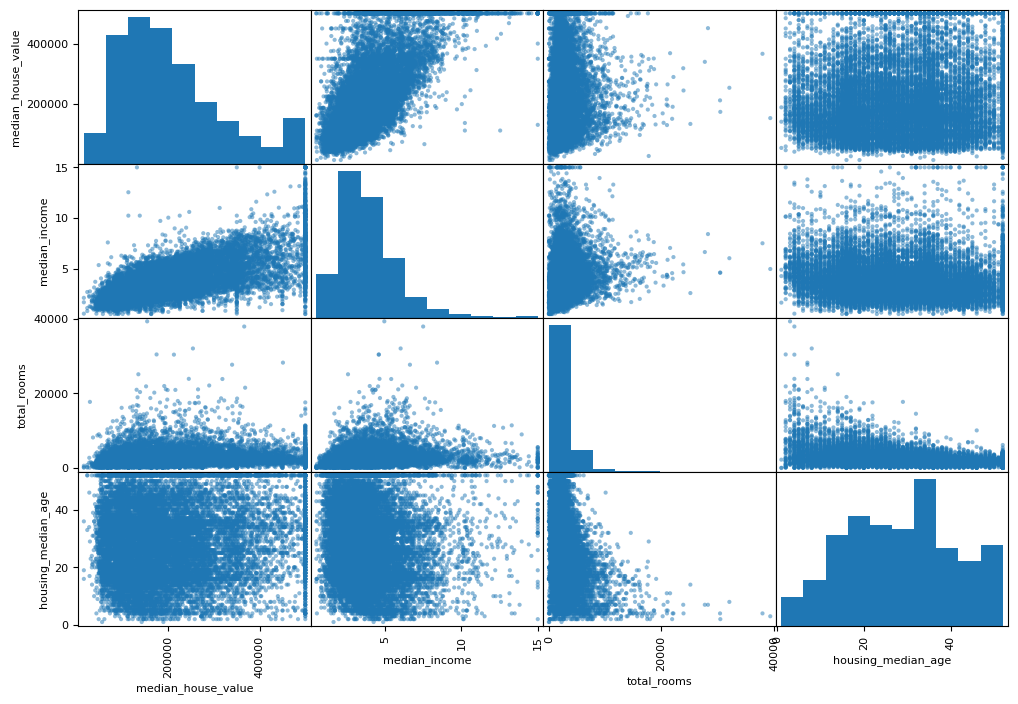

In [92]:
from pandas.plotting import scatter_matrix

# vì ta đã tính hệ số tương quan ở trên.
# ở đây ta chỉ chọn các hệ số có tương quan mạnh để hiển thị theo biểu đồ scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

- Ta quan tâm đến thuộc tính `median_income`. Vì nó có liên quan đến việc dự đoán `median_house_value`.

Saving figure correlation_median_income_versus_median_house_value


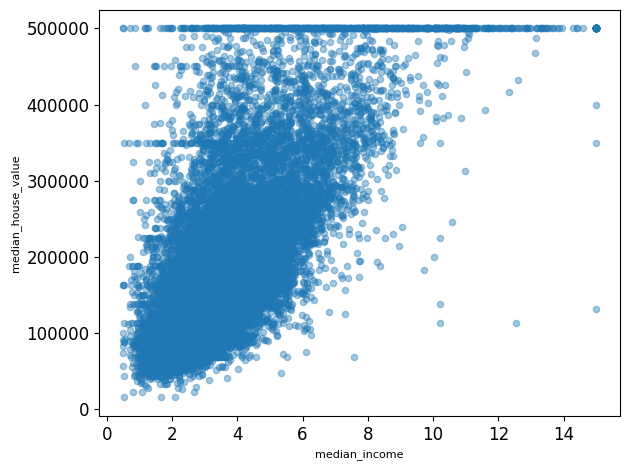

In [93]:
# Phóng to biểu đồ của median_income.
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)
save_fig("correlation_median_income_versus_median_house_value")

- Ta có thể thấy sự tương quan ở đây rất mạnh, và thấy rõ xu hướng đi lên, và dữ liệu không phân tán.
- Mức giá trần hiển thị rõ ràng bằng một đường ngang tại `$500,000`
- Ta cũng có thể thấy một vài đường ngang khác: quanh khoảng `$450,000`, `$350,000`, `$280,000`

## 3.3 (FE) Feature Engineering - Thử nghiệm với Tổ hợp thuộc tính.

Trước khi chuẩn bị dữ liệu cho các thuật toán HM là thử nghiệm hàng loạt các cách kết hợp thuộc tính.
- Ví dụ:
  - Biết tổng số phòng trong một quận `total_rooms` không có ích nếu ta không biết bao nhiêu hộ gia đình trong quận đó. **Thứ ta muốn là số phòng của mỗi hộ**
  - Thông tin `total_bedrooms` cũng không hữu dụng. Ta có thể muốn so sánh nó với `total_rooms`.
  - Số người trong mỗi gia đình `population_per_household` cũng có thể là một thuộc tính kết hợp tốt.

In [94]:
housing_copy["rooms_per_household"] = housing_copy["total_rooms"]/housing_copy["households"]
housing_copy["bedrooms_per_room"] = housing_copy["total_bedrooms"]/housing_copy["total_rooms"]
housing_copy["population_per_household"]=housing_copy["population"]/housing_copy["households"]

In [95]:
# kiểm tra mối tương quan.
corr_matrix = housing_copy.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

Ta có thể thấy rõ các thuộc tính mới
- `bedrooms_per_room` (-0.26) có độ tương quan với `median_house_value` lớn hơn hẳn `total_room` (0.135) | `total_bedrooms` (0.047).
- Các ngôi nhà có tỷ lệ `total_bedrooms/total_rooms` (bedrooms_per_room) **nhỏ** hơn thường có xu hướng đắt hơn.
- Số phòng mỗi nhà `rooms_per_household` cũng mang nhiều thông tin hơn `total_room` trong một quận vì rõ ràng nhà càng lớn thì càng mắc.


Saving figure room_per_household_vs_median_house_vale_corr


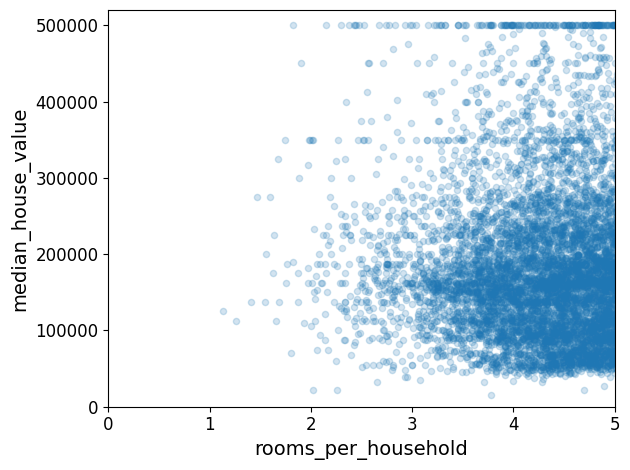

In [96]:
housing_copy.plot(kind="scatter", x="rooms_per_household", y ="median_house_value", alpha=0.2)
plt.axis([0,5,0,520000])
plt.xlabel('rooms_per_household', fontsize=14)
plt.ylabel('median_house_value', fontsize=14)
save_fig("room_per_household_vs_median_house_vale_corr")
plt.show()

In [97]:
housing_copy.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# 4.Chuẩn bị dữ liệu cho các thuật toán HỌC MÁY

In [98]:
# chuẩn bị dữ liệu chuẩn từ stratified set
housing = strat_train_set.drop("median_house_value", axis = 1)

housing_labels = strat_train_set["median_house_value"].copy()

## 4.1 Làm sạch Dữ liệu

Ta thấy `total_bedrooms` có một vài giá trị bị thiếu. Ta có thể xử lý như sau:
- Loại bỏ các quận tương ứng.
`housing.dropna(subset=["total_bedrooms"])`

- Loại bỏ toàn bộ thuộc tính.
`housing.drop("total_bedrooms", axis=1)`

- Gán một giá trị nào đó (0, trung bình, trung vị, v.v.v)
`median = housing["total_bedrooms"].median()`
`housing["total_bedrooms"].fillna(median,inplace=True)`

In [99]:
# Lấy các hàng bị thiếu giá trị ở đặc trưng total_bedrooms
smp_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
smp_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [100]:
# PP1: loại bỏ toàn bộ quận bị thiếu
smp_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# PP2: xoá đặc trưng thiếu giá trị
smp_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [101]:
# PP3: Điền vào 1 giá trị.
# ở đây giả sử ta sẽ lấy trung vị median() để điền vào giá trị thiếu.
median = housing["total_bedrooms"].median()

smp_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)

smp_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [102]:
# Sử dụng SimpleImputer để điền giá trị median() vào các quận thiếu giá trị
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Cần xoá bỏ các thuộc tính văn bản vì không thể tính toán được.

In [107]:
# Lấy danh sách các đặc trưng loại số.
housing_num = housing.select_dtypes(include=[np.number])
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [108]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [109]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Kiểm tra để đảm bảo điều này giống như tính toán thủ công.

In [110]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [111]:
X = imputer.transform(housing_num)

In [113]:
housing_tr =pd.DataFrame(X,columns=housing_num.columns, index=housing.index)

Kiểm tra lại các dòng có giá trị thiếu.

In [114]:
housing_tr.loc[smp_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [115]:
imputer.strategy

'median'

## 4.2 Xử lý các thuộc tính và phân loại

Bây giờ ta sẽ xử lý đặc trưng phân loại đầu vào `ocean_proximity`

In [118]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


- Đây không phải là kiểu dữ liệu văn bản tùy ý: chỉ có một số lượng giới hạn các giá trị khả dụng, mỗi giá trị biểu diễn một hạng mục. Vì vậy thuộc tính này là `thuộc tính hạng mục`

- Sử dụng lớp `OrdinalEncoder` để chuyển đổi biến phân loại về số.

## Sử dụng OrdinalEncoder xử lý thuộc tính hạng mục

In [119]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [120]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- Vấn đề với cách biểu diễn này là `các thuật toán Học Máy sẽ giả định rằng hai giá trị gần nhau thì giống nhau hơn hai giá trị cách xa nhau.`

- Sử dụng lớp `OneHotEncoder` để tránh xảy ra tình trạng trên

## Sử dụng OneHotEncoder xử lý thuộc tính hạng mục

In [121]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

- Đầu ra ở đây là một`ma trận thưa (sparse matrix)` SciPy thay vì một mảng Numpy.

- Tuy nhiên, ta có thể chuyển đổi nó thành một mảng NumPy (dày đặc), chỉ cần gọi phương thức `toarray()`:

In [122]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [123]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [124]:
# dảm bảo trả về một ma trận mật độ (dense matrix) thay vì một ma trận thưa (sparse matrix).
cat_encoder = OneHotEncoder(sparse_output=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 5.Bộ biến đổi tuỳ chỉnh

Tạo bộ biến đổi tuỳ chỉnh để thêm các thuộc tính bổ sung

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

# Column index
col_names = "total_rooms","total_bedrooms","population","households"

# Lấy chỉ số index của mỗi tên cột
rooms_ix, bedrooms_ix, population_ix, households_ix=[housing.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
            return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]


# Ở đây ta dùng TH không thêm thuộc tính bedrooms_per_room
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)

housing_extra_attribs = attr_adder.transform(housing.values)

In [133]:
housing_extra_attribs[0]

array([-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
       'INLAND', 5.485835694050992, 3.168555240793201], dtype=object)

`housing_extra_attribs` là một mảng Numpy. Ta cần chuyển sang DataFrame

In [134]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ["rooms_per_household","population_per_household"],
    index = housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## 5.1 Xây dựng PIPELINE để tiền xử lý các thuộc tính số

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Cần đảm bảo phải có xử lý chuẩn tắc hoá Standardize Scaler() hoặc MinMaxScaler()
num_pipeline = Pipeline([

    # Điền giá trị thiếu
    ("imputer", SimpleImputer(strategy = "median")),

    # Thêm thuộc tính
    ("attribs_adder", CombinedAttributesAdder()),

    # Chuẩn tắc
    ("std_scaler",StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [136]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

## 5.2 Full pipeline xử lý các đặc trưng số và cat

Sử dụng kết hợp `ColumnTransformer` để tiền xử lý các cột.
Sẽ tự lựa chọn xử lý các đặc trưng số, các đặc trưng danh mục

- full_pipeline
  - num_pipeline
  - cat : OneHotEncoder()

In [137]:
from sklearn.compose import ColumnTransformer

# Danh sách các đặc trưng số
num_attribs = list(housing_num)

# Danh sách các đặc trưng danh mục
cat_attribs = ["ocean_proximity"]

# Pipeline xử lý tổng quát các đặc trưng số và danh mục
full_pipeline = ColumnTransformer([

    # Xử lý đặc trưng số
    ("num", num_pipeline, num_attribs),

    # Xử lý đặc trung danh mục
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [138]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [139]:
housing_prepared.shape

(16512, 16)

# 6.Chọn và huấn luyện mô hình

## 6.1 Linear Regressor

In [140]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [141]:
# thử vài mẫu với full_pipeline
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))


Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


So sánh với giá trị thực tế

In [142]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


- Sử dụng `RMSE đo lường độ chính xác của Regression.`
- Sử dụng hàm `mean_square_error()` trong sklearn

### Tính RMSE

In [143]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)

lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)

68627.87390018745


**Lưu ý**: kể từ Scikit-Learn 0.22, bạn có thể lấy RMSE trực tiếp bằng cách gọi hàm `mean_squared_error()` với `squared=False`.

In [144]:
lin_rmse_2 = mean_squared_error(housing_labels, housing_predictions,squared=False)
lin_rmse_2

68627.87390018745

- Giá trị `median_housing_values` ở hầu hết các quận nằm trong khoảng `$120,000` và `$265,000`, mà (RMSE) `sai lệch khoảng $68,628` là chưa tốt.
- Đây là một ví dụ cho việc `mô hình dưới khớp dữ liệu huấn luyện`.

Điều này xảy ra khi `các đặc trưng không cung cấp đủ thông tin để mô hình đưa ra dự đoán tốt hoặc mô hình vẫn chưa đủ mạnh.`

In [145]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)

lin_mae


49438.66860915803

## 6.2 DecisionTreeRegressor

### Giải quyết v/d dưới khớp `(Under-fitting)`
- Phương pháp chính để giải quyết vấn đề dưới khớp là chọn
    - Một mô hình mạnh hơn,
    - Cung cấp đặc trưng tốt hơn cho thuật toán
    - Giảm các điều kiện ràng buộc lên mô hình.

- Mô hình này chưa được điều chuẩn nên ta có thể loại trừ phương án cuối cùng.
- Ta có thể thử thêm các đặc trưng khác (ví dụ như log của dân số)
- Nhưng trước tiên hãy thử sử dụng một mô hình phức tạp hơn để xem kết quả ra sao.

Do `LinearRegressor` dưới khớp nên ta sẽ sử dụng mô hình `DecisionTreeRegressor`.

In [146]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)

tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [147]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

tree_rmse

0.0

- Sai số là `0` - Điều này là không thể.
- Không thể có mô hình này có tỷ lệ tuyệt đối như vầy. Ta cần phải nghiên cứu sâu thêm và `sử dụng các phương pháp kiểm tra chéo`.

## Kiểm định chéo

Tính năng `cross_val_score` của Scikit-Learn làm việc với một `hàm lợi ích (càng cao càng tốt)` thay vì một `hàm chi phí (càng thấp càng tốt)`, nên hàm tính điểm là hàm đối của MSE (tức có giá trị âm).

In [151]:
from sklearn.model_selection import cross_val_score

# kiểm tra chéo mô hình DecisionTreeRegressor
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [152]:
# hàm hiển thị điểm số.
def display_scores(scores):
    print("Scores:\t", scores)
    print("Mean:\t", scores.mean())
    print("Standard deviation:\t", scores.std())

# Hiển thị điểm số mô hình DecisionTreeRegressor
display_scores(tree_rmse_scores)

Scores:	 [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean:	 71629.89009727491
Standard deviation:	 2914.035468468928


In [153]:
# Tính điểm số tương tự trên mô hình hồi quy tuyến tính để so sánh.
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores= np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:	 [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:	 69104.07998247063
Standard deviation:	 2880.3282098180634


- Mô hình `DecisionTreeRegressor` đã quá khớp `(overfitting)` hoạt động tệ hơn mô hình Hồi Quy Tuyến tính 'LinearRegressor`.


## 6.3 RandomForestRegressor

- Ta thử nghiệm với mô hình thứ 3: `RandomForestRegressor`

In [154]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state =42)

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [155]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)

forest_rmse

18650.698705770003

In [156]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error",
                                cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores:	 [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean:	 50435.58092066179
Standard deviation:	 2203.3381412764606


In [159]:
pd.Series(forest_rmse_scores).describe()

count       10.000000
mean     50435.580921
std       2322.522327
min      47210.512698
25%      48682.893887
50%      50812.405036
75%      51872.228024
max      54055.908946
dtype: float64

In [160]:
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)
pd.Series(np.sqrt(-lin_reg_scores)).describe()

count       10.000000
mean     69104.079982
std       3036.132517
min      64114.991664
25%      67077.398482
50%      68718.763507
75%      71357.022543
max      73997.080502
dtype: float64

Ta thấy mô hình `RandomForestRegressor` hoạt động tốt hơn `LinearRegressor`, và `DecisionTreeRegressor`.

## 6.4 SVR (Support Vector Regressor)

- Mô hình thứ 4: SVR

In [161]:
from sklearn.svm import SVR

svm_reg = SVR(kernel = 'linear')

svm_reg.fit(housing_prepared, housing_labels)

housing_predictions = svm_reg.predict(housing_prepared)

svm_rmse=mean_squared_error(housing_labels, housing_predictions,
                            squared = False)
svm_rmse


111095.06635291968

In [163]:
# Kiểm tra chéo mô hình SVR - 'linear'
svr_scores = cross_val_score(svm_reg ,housing_prepared, housing_labels,
                             cv=10,
                             scoring="neg_mean_squared_error")
srv_rmse = np.sqrt(-svr_scores)

display_scores(srv_rmse)

Scores:	 [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean:	 111814.1069260169
Standard deviation:	 2600.8402690892553


In [164]:
pd.Series(srv_rmse).describe()

count        10.000000
mean     111814.106926
std        2741.526360
min      106998.562270
25%      110848.005913
50%      112450.979115
75%      113251.558304
max      116063.778167
dtype: float64

In [166]:
# Hiển thị điểm số mô hình DecisionTreeRegressor
pd.Series(tree_rmse_scores).describe()

count       10.000000
mean     71629.890097
std       3071.663088
min      68960.045444
25%      69602.930320
50%      70525.140962
75%      72753.038693
max      79094.741237
dtype: float64

Mô hình `SVR` thậm chí còn `overfitting` hơn mô hình `DecisionTreeRegressor`

# 7. Tinh chỉnh mô hình.

## 7.1 GridSearchCV

In [ ]:
from pickle import FALSE
from sklearn.model_selection import GridSearchCV

param_grid = [
    # thử nghiệm 3x4=12 kết hợp các siêu tham số
    {'n_estimators':[3,10,30], "max_features": [2,4,6,8]},

    # sau đó thử 6 (2x3) kết hợp với bootstrap:False
    {"bootstrap": [False], "n_estimators":[3,10], "max_features":[2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)

# huấn luyên qua 5 folds. Tổng (12+6)*5=90 vòng huấn luyện
grid_search = GridSearchCV(forest_reg, param_grid,
                           cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Kết hợp siêu tham số tốt nhất được tìm thấy

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Xem qua điểm của mỗi tổ hợp siêu tham số trong quá trình tìm kiếm lưới.

In [ ]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
  print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057890,0.003882,0.003375,0.000131,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.185308,0.002426,0.009342,0.000247,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.558173,0.005474,0.027455,0.002264,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.094673,0.002210,0.003366,0.000127,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.306040,0.004704,0.009662,0.000235,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,1.041566,0.124249,0.028551,0.001880,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.123678,0.001673,0.003563,0.000027,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.418832,0.001595,0.009351,0.000178,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.313327,0.075067,0.027914,0.004158,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.212269,0.002774,0.003877,0.000064,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## 7.2 RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions={
    "n_estimators": randint(low=1, high=200),
    "max_features": randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(estimator = forest_reg,
                                param_distributions = param_distributions,
                                n_iter=10,
                                scoring="neg_mean_squared_error",
                                cv=5,
                                random_state=42)
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbac11e5c90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fbac11e61d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

In [ ]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 180}

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


Ta có thể thấy tham số tốt nhất có rmse thấp nhất `49117`

## Phân tích mô hình tốt nhất và lỗi của chúng

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In ra danh sách điểm số quan trọng cùng tên các thuộc tính tương ứng.

In [ ]:
extra_attribs =["rooms_per_household","pop_per_household","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs =list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_household'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_household'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

Ta có thể thấy dường như chỉ có đặc trưng `ocean_proximity`, `median_income` và `pop_per_household` là có đóng góp quan trọng.

Ta có thể chạy lại mô hình với sự loại bỏ các đặc trung ít quan trọng kia sau đó so sánh kết quả.

In [ ]:
for f, a in zip(feature_importances, attributes):
  print(f," - ", a)

0.06965425227942929  -  longitude
0.0604213840080722  -  latitude
0.04218822024391753  -  housing_median_age
0.01524505568840977  -  total_rooms
0.015554529490469328  -  total_bedrooms
0.015849114744428634  -  population
0.014934655161887776  -  households
0.3790092248170967  -  median_income
0.054778915018283726  -  rooms_per_household
0.10703132208204354  -  pop_per_household
0.048203121338269206  -  bedrooms_per_room
0.006792660074259966  -  <1H OCEAN
0.16570630316895876  -  INLAND
7.834806602687504e-05  -  ISLAND
0.0015247327555504937  -  NEAR BAY
0.0030281610628962747  -  NEAR OCEAN


### Tính khoảng tin cậy 95% cho RMSE thử nghiệm

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc = squared_errors.mean(),
                         scale=stats.sem(squared_errors)
                         )
)

array([45893.36082829, 49774.46796717])

Tính khoảng tin cậy theo phương pháp thủ công.

In [ ]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(45893.360828285535, 49774.46796717361)

Ngoài ra, chúng ta có thể sử dụng `z-scores` thay vì `t-scores`

In [ ]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(45893.9540110131, 49773.921030650374)

Điều này có thể thích hợp nếu kích thước mẫu lớn (đủ lớn) để có thể áp dụng phân phối chuẩn.

## Lưu mô hình tốt nhất.

In [ ]:

import joblib
#joblib.dump(rnd_search, "rnd_search_model.pkl") # DIFF
model_path ='/content/drive/MyDrive/HOCMAY/working/models/'

#joblib.dump(final_model, model_path + "my_final_model.pkl")

#...
# my_model_loaded = joblib.load("my_model.pkl") # DIFF


# BÀI TẬP

##CÂU 1:

- Hãy thử sử dụng một bộ hồi quy `SVM (sklearn.svm.SVR)` với một vài siêu tham số như `kernel=“linear”` (với những giá trị khác nhau cho C) hoặc k`ernel=“rbf”` (với các giá trị khác nhau cho `C` và `gamma`). Đừng vội quan tâm đến những siêu tham số này là gì. Chất lượng của mô hình SVR tốt nhất như thế nào?

**Chú ý:** Cell bên dưới có thể tốn hơn 1h để chạy.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel': ["linear"], "C": [10.,30.,100.,300.,1000.,3000.,10000.,30000.0]},
    {"kernel": ["rbf"], "C": [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
     "gamma": [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg =SVR()
grid_search = GridSearchCV(estimator = svm_reg, param_grid = param_grid,
                           scoring="neg_mean_squared_error",
                           verbose=2)
grid_search.fit(housing_prepared, housing_labels)


Kiểm tra điểm số đạt được của mô hình tốt nhất.

In [ ]:
neg_mse = grid_search.best_score_
rmse = np.sqrt(-neg_mse)
rmse

70286.61835383571

Có vẻ tệ hơn nhiều so với mô hình final_model (sử dụng GridSearchCV -RandomForestRegressor)

In [ ]:
# final_model = GridSearchCV - estimator = RandomForestRegressor
# rmse_final_model = 49898.98913455217 {'max_features': 8, 'n_estimators': 30}
final_rmse

47873.26095812988

Xem những siêu tham số đạt được

In [ ]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

siêu tham số tốt nhất của GridSearchCV ở trên cho ta biết `kernel:linear` và `'C':30000`. Ta sẽ thử chạy tiếp mô hình với `C >30000` và `kernel:linear`

In [ ]:
param_grid = [
    {'kernel': ["linear"], "C": np.linspace(start = 30000.0,
                                         stop = 300000.0,
                                         num=10)},
]
svm_reg =SVR()
grid_search = GridSearchCV(estimator = svm_reg, param_grid = param_grid,
                           scoring="neg_mean_squared_error",
                           verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................C=30000.0, kernel=linear; total time=  11.0s
[CV] END ...........................C=30000.0, kernel=linear; total time=  10.2s
[CV] END ...........................C=30000.0, kernel=linear; total time=   9.3s
[CV] END ...........................C=30000.0, kernel=linear; total time=  10.2s
[CV] END ...........................C=30000.0, kernel=linear; total time=  11.1s
[CV] END ...........................C=60000.0, kernel=linear; total time=  16.1s
[CV] END ...........................C=60000.0, kernel=linear; total time=  16.6s
[CV] END ...........................C=60000.0, kernel=linear; total time=  14.2s
[CV] END ...........................C=60000.0, kernel=linear; total time=  15.0s
[CV] END ...........................C=60000.0, kernel=linear; total time=  15.7s
[CV] END ...........................C=90000.0, kernel=linear; total time=  22.5s
[CV] END ...........................C=90000.0, k

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': array([ 30000.,  60000.,  90000., 120000., 150000., 180000., 210000.,
       240000., 270000., 300000.]),
                          'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Tính điểm RMSE
neg_mse_2 = grid_search.best_score_
rmse_2 = np.sqrt( -neg_mse_2)
rmse_2
#70286.61835383571

70283.64554836667

In [ ]:
2.973/70286.618*100 # Chỉ giảm 0.004%

0.00422982366287705

In [ ]:
# Tham số tốt nhất
grid_search.best_params_

{'C': 300000.0, 'kernel': 'linear'}

Ta nhận thấy điểm số vẫn không có thay đổi. Vậy siêu tham số

##Câu 2

Thay `GridSearchCV` bằng `RandomizedSearchCV`

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more
# probability distribution functions.

# Note: gamma is ignored when kernel is "linear"

param_distribs={
    "kernel": ["linear","rbf"],
    "C": reciprocal(20,200000),
    "gamma": expon(scale=1.0),
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(estimator = svm_reg,
                                param_distributions = param_distribs,
                                n_iter=50,
                                cv =5,
                                scoring="neg_mean_squared_error",
                                verbose=2,
                                n_jobs= -1,
                                random_state=42)

rnd_search.fit(housing_prepared, housing_labels)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5e757d4790>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a5e757d6560>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Kiểm tra số điểm đạt được

In [ ]:
neg_mse = rnd_search.best_score_
rmse_svr_rand = np.sqrt(-neg_mse)
rmse_svr_rand

54751.69009488048

Bây giờ đã gần hơn với chất lượng của `RandomForestRegressor` (nhưng chưa hoàn toàn ở đó). Hãy thử với những siêu tham số tốt nhất được tìm thấy:

In [ ]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

Lần này bộ tìm kiếm đã tìm thấy tập hợp những siêu tham số tốt cho `kernel='brf'`. Tìm kiếm ngẫu nhiên có xu hướng tìm các siêu tham số tốt hơn so với tìm kiếm lưới trong cùng một khoảng thời gian.

In [ ]:
# final_model = GridSearchCV - estimator = RandomForestRegressor
# rmse_final_model = 49898.98913455217 {'max_features': 8, 'n_estimators': 30}
final_rmse

47873.26095812988

## Câu 3

Thêm một bộ biến đổi vào pipeline để chỉ chọn các thuộc tính quan trọng nhất.


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indice_of_top_k(arr, k):
  return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):

  def __init__(self, feature_importances, k):
    self.feature_importances = feature_importances
    self.k = k

  def fit(self, X, y=None):
    self.feature_indices_ = indice_of_top_k(self.feature_importances, self.k)
    return self

  def transform(self, X):
    return X[:, self.feature_indices_]


Lưu ý: bộ chọn đặc trưng này giả định rằng bạn đã tính toán các lần nhập đặc trưng bằng một cách nào đó (sử dụng `RandomForestRegressor` chẳng hạn). Bạn có thể bị cám dỗ để tính toán chúng trực tiếp trong phương thức `fit()` của `TopFeatureSelector`; tuy nhiên, điều này có thể làm chậm đi quá trình tìm kiếm lưới/ngẫu nhiên vì các lần nhập đặc trưng sẽ phải được tính toán cho mọi tổ hợp siêu tham số (trừ khi bạn triển khai một số loại bộ nhớ cache).

In [ ]:
# Số lượng đặc trưng ta muốn giữ lại
k=5

Bây giờ ta tìm kiếm các chỉ tốt với số lượng k

In [ ]:
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [ ]:
top_k_feature_indices = indice_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [ ]:
print(attributes)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'pop_per_household', 'bedrooms_per_room', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


In [ ]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_household',
       'INLAND'], dtype='<U19')

Kiểm tra lại liệu đây có phải thật sự là đặc trưng `k` tốt hay không?

In [ ]:
sorted(zip(feature_importances,attributes),reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_household'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection",TopFeatureSelector(feature_importances, k))
])


In [ ]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

Xem các đặc trưng của 3 trường hợp đầu tiên.

In [ ]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

## Câu 4:

Thử tạo một pipeline đơn giản có thể thực hiện từ việc chuẩn bị dữ liệu đến việc đưa ra dự đoán cuối cùng.

In [ ]:
#rnd_search.best_params_
# {'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k)),
    ("svm_reg",SVR(C=157055.10989448498,gamma=0.26497040005002437, kernel='rbf')),  #SVR(**rnd_search.best_params_))
])

In [ ]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [ ]:
# Thử một vài mẫu
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:	 [72100.0, 279600.0, 82700.0, 112500.0]


Toàn bộ pipeline hoạt động tốt. Tuy nhiên, dự đoán không hẳn là hoàn hảo.
Chúng sẽ cải thiện hơn nếu ta dùng `RandomForestRegressor`, thay vì là `SVR`.

## Câu 5:

Tự động khám phá một số tuỳ chọn trong việc chuẩn bị dữ liệu bằng cách sử dụng `GridSearchCV`

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

In [ ]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}

Chiến lược tiềm ẩn tốt nhất là `mean` và có lẽ chỉ có một đặc trưng quan trọng là `median_income`.